In [109]:
import numpy as np
from numpy import *
import scipy as scipy
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt 
import math
import random

In [169]:
# all units are in CGS
a0 = 5.2918*(10**-9)
e =  4.80320425*(10**-10)
Z = 2
c = 3*(10**10)
me = 9.109*(10**-24)
IonCharge = Z*e
xi_ion = 0
yi_ion = 0
xi_e = -a0*500
yi_e = a0*500
vi_e = 10**7 
t_i = 0

In [170]:
#Setting axes and timescale
x_ion = np.linspace(500,0.1,5000)
y_ion = np.linspace(500,0.1,5000)
x_e = np.linspace(xi_e,0.1,5000)
y_e = np.linspace(yi_e,0.1,5000)
r_e = [math.sqrt(a**2 +b**2) for a,b in zip(x_e,y_e)]
t = np.linspace(0,1,5000)


In [171]:
#igonre this
def calcs(x_i, v_i, ti, deltat, e, IonCharge, me):
        x_i = x_i + x
        t_i = t_i + deltat
        f = e*IonCharge/x_i**2
        a_x = f/me
        v = a_x*t_i
        x = v*t_i - .5*a_x*t_i**2
        return a_x
        return v
        return x
        print(a_x)

In [199]:
#using Bremstalung law F=Ze^2/b^2, b^2 = (x^2+y^2)^1/2
F_i = e*IonCharge/(xi_e**2+yi_e**2)**.5
a_i= F_i/me
print(F_i)
print(a_i)

1.2331152854478475e-13
13537328855.503872


In [173]:
#Force projected in x direction Fbrem*cos(theta)
#cos(theta) = x/sqrt(x^2+y^2)
#Force projected in y direction Fbrem*sin(theta)
#sin(theta) = y/sqrt(x^2+y^2)
def position(vx_i, vy_i, dt, t, e, IonCharge, me, x_i,y_i):
    N = t.size - 1
    time = np.zeros(N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1) 
    u = np.zeros(N+1) 
    v = np.zeros(N+1) 
    fx = np.zeros(N+1)
    fy = np.zeros(N+1)
    ax = np.zeros(N+1)
    ay = np.zeros(N+1)
    x[0] = x_i
    y[0] = y_i
    u[0] = vx_i
    v[0] = vy_i
    
    for n in range(N):
        fx[n] = (-e*IonCharge*x[n])/(y[n]**2+x[n]**2)*(x[n]/(y[n]**2+x[n]**2)**.5)
        fy[n] = (-e*IonCharge)/(y[n]**2+x[n]**2)*(y[n]/(y[n]**2+x[n]**2)**.5)
        ax[n] = fx[n]/me
        ay[n] = fy[n]/me
        x[n+1] = x[n]+u[n]*dt+.5*ax[n]*dt**2
        y[n+1] = y[n]+v[n]*dt+.5*ay[n]*dt**2
        v[n+1] = v[n] +ax[n]*dt
        u[n+1] = u[n] + ay[n]*dt
        time[n+1] = time[n] + dt
        
    return x, y, u, v, fx, fy, ax, ay, time 



In [174]:
test =np.linspace(0,1,100000)

In [175]:
tx,ty,tu,tv,tfx,tfy,tax,tay,ttime = position(vi_e, 0, 1e-10, test , e, IonCharge, me, xi_e, yi_e) 

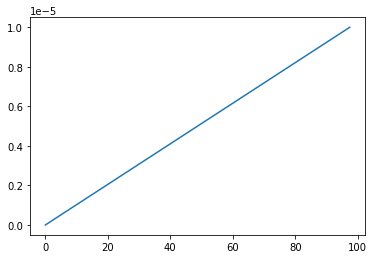

In [176]:
plt.plot(tx, ttime)

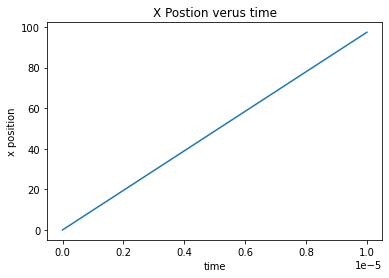

In [177]:
plt.plot(ttime,tx)
plt.xlabel("time")
plt.ylabel("x position")
plt.title("X Postion verus time")
plt.show()

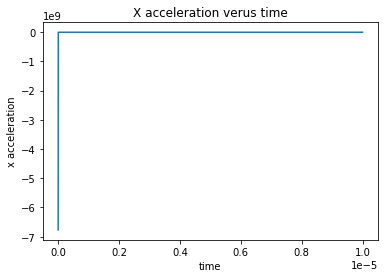

In [178]:
plt.plot(ttime,tax)
plt.xlabel("time")
plt.ylabel("x acceleration")
plt.title("X acceleration verus time")
plt.show()

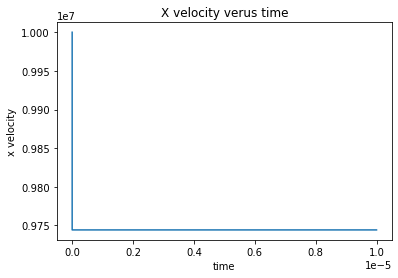

In [179]:
plt.plot(ttime,tu)
plt.xlabel("time")
plt.ylabel("x velocity")
plt.title("X velocity verus time")
plt.show()

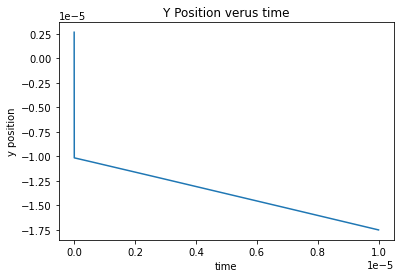

In [180]:
plt.plot(ttime,ty)
plt.xlabel("time")
plt.ylabel("y position")
plt.title("Y Position verus time")
plt.show()

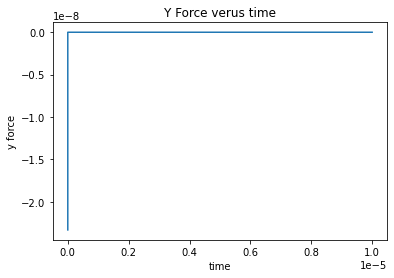

In [181]:
#debug
plt.plot(ttime, tfy)
plt.xlabel("time")
plt.ylabel("y force")
plt.title("Y Force verus time")
plt.show()

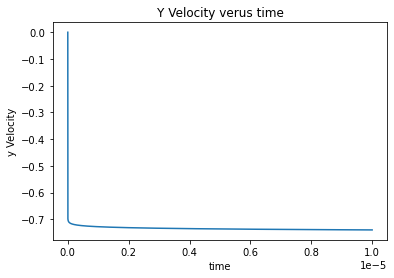

In [182]:
plt.plot(ttime, tv)
plt.xlabel("time")
plt.ylabel("y Velocity")
plt.title("Y Velocity verus time")
plt.show()

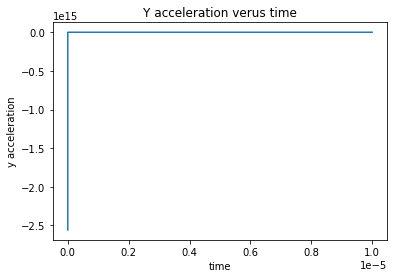

In [183]:
plt.plot(ttime,tay)
plt.xlabel("time")
plt.ylabel("y acceleration")
plt.title("Y acceleration verus time")
plt.show()

In [184]:
tr = [math.sqrt(a**2+b**2) for a,b in zip(tx,ty)]

In [185]:
#for r coordinate r=sqrt(x**2+y**2) F=zq^2/b
def rcord(vx_i, vy_i, dt, t, e, IonCharge, me, x_i,y_i):
    N = t.size - 1
    time = np.zeros(N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    b = np.zeros(N+1)
    u = np.zeros(N+1) 
    v = np.zeros(N+1) 
    fx = np.zeros(N+1)
    fy = np.zeros(N+1)
    f = np.zeros(N+1)
    ax = np.zeros(N+1)
    ay = np.zeros(N+1)
    a = np.zeros(N+1)
    x[0] = x_i
    y[0] = y_i
    b[0] = math.sqrt(x[0]**2+y[0]**2)
    u[0] = vx_i
    v[0] = vy_i
    
    for n in range(N):
        fx[n] = (-e*IonCharge*x[n])/(y[n]**2+x[n]**2)*(x[n]/(y[n]**2+x[n]**2)**.5)
        fy[n] = (-e*IonCharge)/(y[n]**2+x[n]**2)*(y[n]/(y[n]**2+x[n]**2)**.5)
        f[n] = (-e*IonCharge)/(y[n]**2+x[n]**2)
        ax[n] = fx[n]/me
        ay[n] = fy[n]/me
        a[n] = f[n]/me
        x[n+1] = x[n]+u[n]*dt+.5*ax[n]*dt**2
        y[n+1] = y[n]+v[n]*dt+.5*ay[n]*dt**2
        b[n+1] = math.sqrt(x[n+1]**2+y[n+1]**2)
        v[n+1] = v[n] +ax[n]*dt
        u[n+1] = u[n] + ay[n]*dt
        time[n+1] = time[n] + dt
    return x, y, b, f, a, time 




In [186]:
rx,ry,rb,rf,ra,rtime = rcord(vi_e, 0, 1e-10, test , e, IonCharge, me, xi_e, yi_e) 

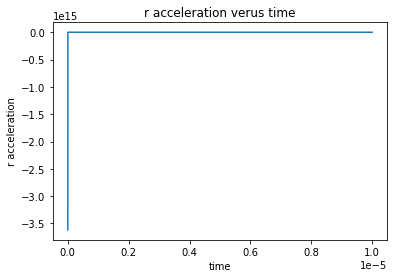

In [187]:
plt.plot(rtime,ra)
plt.xlabel("time")
plt.ylabel("r acceleration")
plt.title("r acceleration verus time")
plt.show()

In [188]:
fourier = fft(ra)

In [189]:
#freq = 1/time
freq = [1/a for a in rtime]

<ipython-input-189-21d52586f155>:2: RuntimeWarning: divide by zero encountered in double_scalars
  freq = [1/a for a in rtime]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


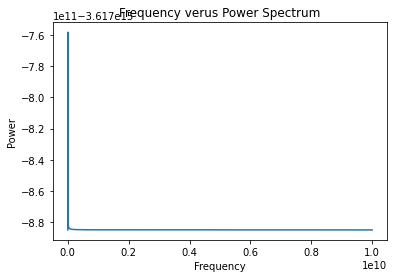

In [190]:
plt.plot(freq, fourier)
plt.ylabel("Power")
plt.xlabel("Frequency")
plt.title("Frequency verus Power Spectrum")
plt.show()

In [191]:
#varying b
r1x,r1y,r1b,r1f,r1a,r1time = rcord(vi_e, vi_e, 1e-10, test , e, IonCharge, me, xi_e, yi_e*5) 

In [192]:
freq = [1/a for a in r1time]

<ipython-input-192-56ff50bc3b76>:1: RuntimeWarning: divide by zero encountered in double_scalars
  freq = [1/a for a in r1time]


In [193]:
fourier1 = fft(r1a)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


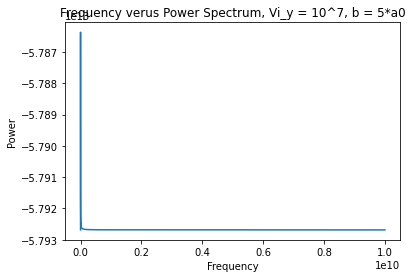

In [167]:
plt.plot(freq, fourier1)
plt.ylabel("Power")
plt.xlabel("Frequency")
plt.title("Frequency verus Power Spectrum, Vi_y = 10^7, b = sqrt(-500*a0^2+2500*a0^2)")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


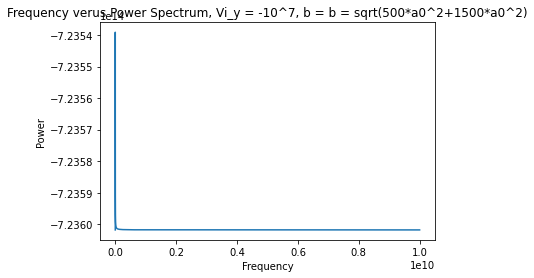

In [195]:
r2x,r2y,r2b,r2f,r2a,r2time = rcord(vi_e, -vi_e, 1e-10, test , e, IonCharge, me, xi_e*-1, yi_e*3) 
fourier2 = fft(r2a)
plt.plot(freq, fourier2)
plt.ylabel("Power")
plt.xlabel("Frequency")
plt.title("Frequency verus Power Spectrum, Vi_x = 10^7, Vi_y = -10^7, b = b = sqrt(500*a0^2+1500*a0^2)")
plt.show()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


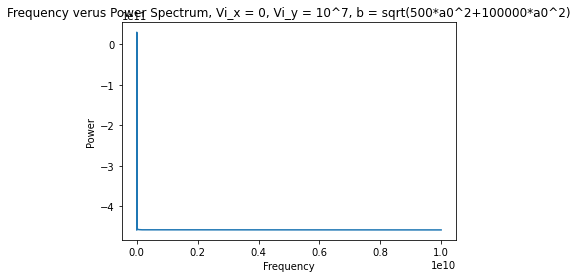

In [197]:
r3x,r3y,r3b,r3f,r3a,r3time = rcord(0,-vi_e, 1e-10, test , e, IonCharge, me, xi_e, yi_e*200)
fourier3 = fft(r3a)
plt.plot(freq, fourier3)
plt.ylabel("Power")
plt.xlabel("Frequency")
plt.title("Frequency verus Power Spectrum, Vi_x = 0, Vi_y = 10^7, b = sqrt(500*a0^2+100000*a0^2)")
plt.show()

OLD CODE

In [ ]:
def position_y(v_i, t, e, IonCharge, me, y_i):
    N = t.size - 1
    dt = t[1] - t[0]  
    u = np.zeros(N+1)
    v = np.zeros(N+1)
    f = np.zeros(N+1)
    a = np.zeros(N+1)
    u[0] = y_i
    f[0] = e*IonCharge/(u[0]**2)
    a[0] = f[0]/me
    v[0] = v_i
    v[1] = v[0] + a[0]*t[1]
    u[1] = u[0] + v[1]*t[1] - .5*a[1]*t[1]**2
    f[1] = e*IonCharge/(u[1]**2)
    a[1] = f[1]/me
    
    for n in range(1,N):
        f[n+1] = e*IonCharge/(u[n]**2)
        a[n+1] = f[n+1]/me
        v[n+1] = v[n] +a[n+1]*t[n+1]
        u[n+1] = u[n] + v[n+1]*t[n+1] - .5*a[n+1]*t[n+1]**2
        
    return u
    #return f
    #return a
    #return v
    print (u)
    #print(f)
    #print(a)
    #print(v)
def force_y(v_i, t, e, IonCharge, me, y_i):
    N = t.size - 1
    dt = t[1] - t[0]  
    u = np.zeros(N+1)
    v = np.zeros(N+1)
    f = np.zeros(N+1)
    a = np.zeros(N+1)
    u[0] = y_i
    f[0] = e*IonCharge/(u[0]**2)
    a[0] = f[0]/me
    v[0] = v_i
    v[1] = v[0] + a[1]*t[1]
    u[1] = u[0] + v[1]*t[1] - .5*a[1]*t[1]**2
    f[1] = e*IonCharge/(u[1]**2)
    a[1] = f[1]/me
    
    for n in range(1,N):
        f[n+1] = e*IonCharge/(u[n]**2)
        a[n+1] = f[n+1]/me
        v[n+1] = v[n] +a[n+1]*t[n+1]
        u[n+1] = u[n] + v[n+1]*t[n+1] - .5*a[n+1]*t[n+1]**2
        
    #return u
    return f
    #return a
    #return v
    #print (u)
    print(f)
    #print(a)
    #print(v)
def acc_y(v_i, t, e, IonCharge, me, y_i):
    N = t.size - 1
    dt = t[1] - t[0]  
    u = np.zeros(N+1)
    v = np.zeros(N+1)
    f = np.zeros(N+1)
    a = np.zeros(N+1)
    u[0] = y_i
    f[0] = e*IonCharge/(u[0]**2)
    a[0] = f[0]/me
    v[0] = v_i
    v[1] = v[0] + a[1]*t[1]
    u[1] = u[0] + v[1]*t[1] - .5*a[1]*t[1]**2
    f[1] = e*IonCharge/(u[1]**2)
    a[1] = f[1]/me
    
    for n in range(1,N):
        f[n+1] = e*IonCharge/(u[n]**2)
        a[n+1] = f[n+1]/me
        v[n+1] = v[n] +a[n+1]*t[n+1]
        u[n+1] = u[n] + v[n+1]*t[n+1] - .5*a[n+1]*t[n+1]**2
        
    #return u
    #return f
    return a
    #return v
    #print (u)
    #print(f)
    print(a)
    #print(v)
def vel_y(v_i, t, e, IonCharge, me, y_i):
    N = t.size - 1
    dt = t[1] - t[0]  
    u = np.zeros(N+1)
    v = np.zeros(N+1)
    f = np.zeros(N+1)
    a = np.zeros(N+1)
    u[0] = y_i
    f[0] = e*IonCharge/(u[0]**2)
    a[0] = f[0]/me
    v[0] = v_i
    v[1] = v[0] + a[1]*t[1]
    u[1] = u[0] + v[1]*t[1] - .5*a[1]*t[1]**2
    f[1] = e*IonCharge/(u[1]**2)
    a[1] = f[1]/me
    
    for n in range(1,N):
        f[n+1] = e*IonCharge/(u[n]**2)
        a[n+1] = f[n+1]/me
        v[n+1] = v[n] +a[n+1]*t[n+1]
        u[n+1] = u[n] + v[n+1]*t[n+1] - .5*a[n+1]*t[n+1]**2
        
    #return u
    #return f
    #return a
    return v
    #print (u)
    #print(f)
    #print(a)
    print(v)

